# **Feature Engineering (Train)**

##### Ahora trataremos de aumentar el número de valores en las variables existentes, al derivar otros nuevos de las variables y tendencias existentes. En esta parte, transformaremos nuestros datos para crear nuevas variables o mejorar las ya existentes.

##### Procesaremos los datos orginales del csv obtenido de Kaggle para preparar el csv para el train(entrenamiento).

### **IMPORTACIÓN DE LIBRERIAS NECESARIAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **EXTRACCIÓN/CARGA DE DATOS**

In [2]:
data_train = pd.read_csv('../data/RAW/train.csv', sep=',')

In [3]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### **Vamos a visualizar los valores **missing/faltantes** dentro de cada variable del dataset**

In [4]:
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### **Porcentaje de valores missing**

In [5]:
total_col = data_train.columns[data_train.isna().any()].tolist()

miss_data = pd.DataFrame(data_train[total_col].isnull().sum(), columns=['Nulos'])
miss_data['Porcentaje'] = np.round(miss_data['Nulos'] / len(data_train) * 100, 2)
miss_data.sort_values(by='Nulos', ascending=False)

,Nulos,Porcentaje
CryoSleep,217,2.50
ShoppingMall,208,2.39
VIP,203,2.34
HomePlanet,201,2.31
Name,200,2.30
Cabin,199,2.29
VRDeck,188,2.16
FoodCourt,183,2.11
Spa,183,2.11
Destination,182,2.09


### **Visualizamos los valores missing/nulos mediante gráficos**

In [21]:
px.imshow(data_train.isna(), title = "Heatmap de Valores Nulos o Missing")

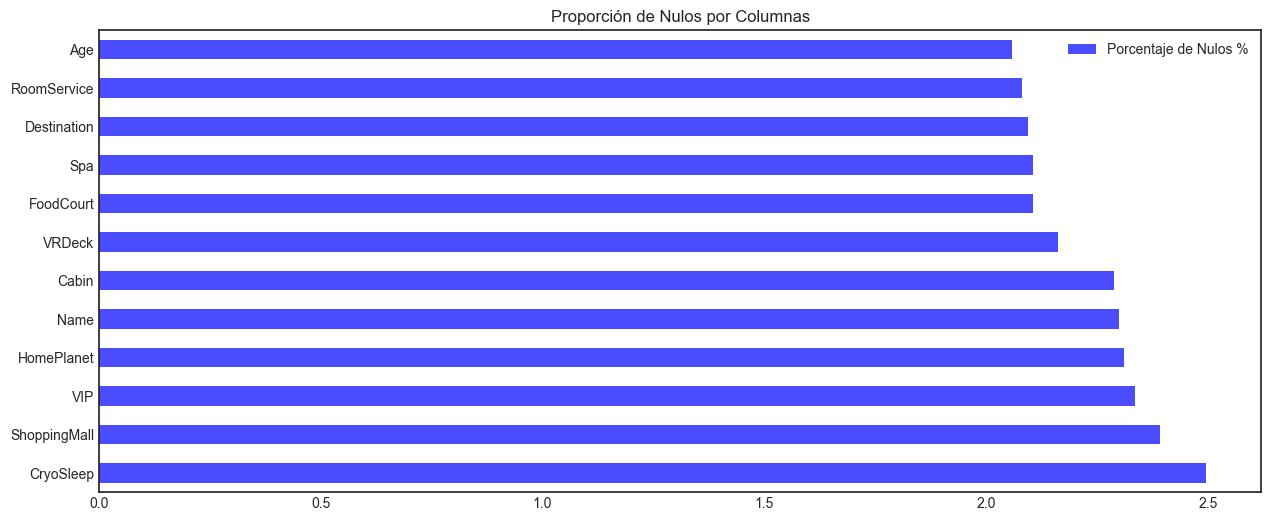

In [19]:
plt.style.use("seaborn-white")

def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Porcentaje de Nulos %' :na_df})
        missing_data.plot(kind = "barh", title="Proporción de Nulos por Columnas", color='blue', alpha=0.7, figsize=(15, 6))
        plt.show()
    else:
        print('No Nas found')
plot_nas(data_train);

Podemos observar que tenemos muchos valores NaN, o missing. Solucionar esto será nuestra prioridad para así poder tratar con los datos de una forma correcta. 

Tenemos dos alternativas para este problema. Una será eliminar todos los valores NaN directamente, o bien, la segunda opción sería sustituirlos con valores nosotros mismos, es decir, "rellenamos los espacios sin datos, o con datos nulos".

La primera opción es un poco arriegada a priori, asi que vamos a utilizar la segunda opción. Para ello necesitaremos convertir todos los datos de todas la variables que no sean numéricas a tipo numérico, entre otras cosas. 

**Comencemos!!**

## **Asignación & Imputación**

Ahora vamos a proceder a modificar algunos aspectos de los datos, y despúes proceder a covertir en tipo numérico todas las varibales categóricas(codificación), y finalmente el escalado estandarizado, que nos permitirá comenzar a contruir nuestro modelo predictivo de una forma fiable

1. Primero vamos a reunir las columnas de "Spa", "FoodCourt", "ShoppingMall", "VRDeck", "RoomService" en una sola columna, la llamaremos "Add_Services". Y crearemos otra nueva para los pasajeros que no gastaron nada en servicios extra, "No_Services", identificando los pasajeros que no gastaron con el valor 1 (True) y los que si lo hicieron con el valor 0 (False).

In [6]:
data_train["Add_Services"] = data_train["RoomService"] + data_train["FoodCourt"] + data_train["ShoppingMall"] + data_train["Spa"] + data_train["VRDeck"]

In [7]:
data_train['No_Services'] = (data_train['Add_Services'] == 0).astype(int)

### Vamos a borrar las columnas que hemos reunido en Add_Services

In [8]:
data_train.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1, inplace=True)

### Visualizamos mediante un gráfico la relación entre el target y la varibale Add_Services

In [27]:
px.histogram(data_train, x = 'Add_Services', color = 'Transported')

##### Podemos observar en el histograma que la mayoría de los pasajeros no gasta dinero, y la distribución del gasto decae exponencialmente.  Hay un pequeño número de valores atípicos, pero poco significativos. Las personas que fueron transportadas tendieron a gastar poco o nada.

   2. Ahora vamos a dividir la columna 'Cabin', en tres, 'Floor', 'Num' y 'Cabin_Side'. Y nos quedaremos unicamente con la variable 'Cabin_Side', que nos indica si el pasajero está ubicado en Babor(P) o Estribor(S). No parece que vaya a ser una variable muy relevante de todas maneras, pero de momento solamente vamos a modificar su estructura para que nos se más sencillo manejarla y ya veremos si nos conviene más adelante eliminarla.

In [9]:
data_train[['Floor', 'Num', 'Cabin_Side']] = data_train['Cabin'].str.split('/', 2, expand=True)

3. Ahora vamos a eliminar las variables sobrantes, como 'Cabin', 'Num' y 'Floor'. También vamos a eliminar otra que no aporta nada que son los nombres de los pasajeros 'Name'.

In [10]:
data_train.drop(["Name", "Num", "Cabin", "Floor"], axis=1, inplace=True)

### Ahora comprobamos de nuevo cuántos valores nulos tenemos

In [11]:
data_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
Transported       0
Add_Services    908
No_Services       0
Cabin_Side      199
dtype: int64

##### Podemos ver que la única columna que no presenta valores nulos o faltantes es el target "Transported", y las variables "No_Services" y "PassengerId".

##### A todas las demás variables le faltan muchos valores que tendremos que ver que vamos a hacer con ellos. Anteriormente decidimos rellenarlos, así lo haremos, dependiendo de la variable, con la media, mediana, moda o cualquier sustitución estadística. Esta será una forma segura de no introducir ningún sesgo en los datos que pueda influir más adelante en la parte de predicción.

### RESUMEN DATA CLAENING

### Este es el resumen de lo que vamos a hacer, para rellenar los valores faltantes/nulos/missing:

1. Vamos a insertar la moda (valor más común) en las variables "Cabin_Side", "Destination" y "VIP"
   
2. Para los valores faltantes de la variable “CryoSleep” los rellenaremos con False o True según los pasajeros hayan consumido servicios extra o no. Suponiendo que los que consumieron servicios estaban despiertos, y los que no consumieron estaban en animación suspendida.
   
3. Insertaremos la mediana (tendencia central del conjunto de datos) , 27 años, en la variable "Age”.
   
4. Insertaremos el valor 0, en los valores faltantes de la variable "Add_Services”, ya que la gran mayoría de los pasajeros estaban en cryosueño, o como hemos visto en los gráficos no consumieron nada de servicios extra.

In [12]:
# 1: Buscamos la moda de las cinco variables dónde queremos introucir este parámetro para sustituir o rellenar los valores faltantes

data_train[['Cabin_Side', 'CryoSleep', 'Destination', 'VIP', 'HomePlanet' ]].mode()

,Cabin_Side,CryoSleep,Destination,VIP,HomePlanet
0,S,False,TRAPPIST-1e,False,Earth


### Comenzamos el proceso de "rellenar" los valores nulos o missing

##### Insertamos la moda

In [13]:
data_train['CryoSleep'].fillna(1, inplace=True)

data_train['Destination'].fillna('TRAPPIST-1e', inplace=True)

data_train['VIP'].fillna(0, inplace=True)

data_train['Cabin_Side'].fillna('S', inplace=True)

data_train['HomePlanet'].fillna('Earth', inplace=True)

Con la variable 'HomePlanet', que consta de tres planetas de origen, vamos a dividirlos en 3 columnas según el planeta, con el método get_dummies. Y ya las tendremos transformadas a valores numéricos para poder trabajarlas.

In [14]:
Origen = pd.get_dummies(data_train['HomePlanet'])
Origen

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [15]:
# Introducimos las nuevas variables en el dataframe de train que estamos procesado y borramos la variable 'HomePlanet'

data_train = pd.concat([data_train, Origen], axis=1)

In [16]:
data_train.drop(["HomePlanet"], axis=1, inplace=True)

También haremos lo mismo que con la anterior a la variable 'Destination', que consta de tres exoplanetas de destino, vamos a dividirlos en 3 columnas según el exoplaneta, con el método get_dummies. Y ya las tendremos transformadas a valores numéricos para poder trabajarlas.

In [17]:
Destino = pd.get_dummies(data_train['Destination'])
Destino

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
8688,1,0,0
8689,0,1,0
8690,0,0,1
8691,1,0,0


In [18]:
# Introducimos las nuevas variables en el dataframe de train que estamos procesado y borramos la variable 'Destination'

data_train = pd.concat([data_train, Destino], axis=1)

In [19]:
data_train.drop(["Destination"], axis=1, inplace=True)

##### Insertamos la mediana

In [20]:
data_train['Age'].median()

27.0

In [21]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)

##### Insertamos el valor 0 en los datos faltantes

In [22]:
data_train['Add_Services'].fillna(0, inplace=True)

##### Comprobamos como ha quedado

In [23]:
data_train.head()

,PassengerId,CryoSleep,Age,VIP,Transported,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,False,39.0,False,False,0.0,1,P,0,1,0,0,0,1
1,0002_01,False,24.0,False,True,736.0,0,S,1,0,0,0,0,1
2,0003_01,False,58.0,True,False,10383.0,0,S,0,1,0,0,0,1
3,0003_02,False,33.0,False,False,5176.0,0,S,0,1,0,0,0,1
4,0004_01,False,16.0,False,True,1091.0,0,S,1,0,0,0,0,1


### Volvemos a comprobar los valores nulos o missing

In [24]:
data_train.isnull().sum()

PassengerId      0
CryoSleep        0
Age              0
VIP              0
Transported      0
Add_Services     0
No_Services      0
Cabin_Side       0
Earth            0
Europa           0
Mars             0
55 Cancri e      0
PSO J318.5-22    0
TRAPPIST-1e      0
dtype: int64

## Codificación de datos

#### Ahora es el momento de modificar algunos de los valores del conjunto de datos. Covertirlos a valores numéricos

##### Tenemos tres variables con valores binarios. Estas son "CryoSleep", "VIP", y "Transported". Sus valores son "Verdadero" o "Falso" (True/False), así que vamos a cambiarlos a numérico, donde "0" = "Falso" y "1" = "Verdadero". Lo haremos sólo con dos de ellas, ya que el target nos conviene dejarlo en tipo Booleano.

In [25]:
var_bin = ["CryoSleep", "VIP"]

data_train[var_bin] = data_train[var_bin].replace({True:1, False:0}).astype(int)
data_train[var_bin] = data_train[var_bin].replace({True:1, False:0}).astype(int)

##### Transformamos la varibale 'Cabin_Side', que tiene dos valores, S y P, en 0 y 1. S = 1, y P = 0.

In [26]:
data_train["Cabin_Side"] = data_train["Cabin_Side"].replace({'S':1, 'P':0}).astype(int)

In [27]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   CryoSleep      8693 non-null   int64  
 2   Age            8693 non-null   float64
 3   VIP            8693 non-null   int64  
 4   Transported    8693 non-null   bool   
 5   Add_Services   8693 non-null   float64
 6   No_Services    8693 non-null   int64  
 7   Cabin_Side     8693 non-null   int64  
 8   Earth          8693 non-null   uint8  
 9   Europa         8693 non-null   uint8  
 10  Mars           8693 non-null   uint8  
 11  55 Cancri e    8693 non-null   uint8  
 12  PSO J318.5-22  8693 non-null   uint8  
 13  TRAPPIST-1e    8693 non-null   uint8  
dtypes: bool(1), float64(2), int64(4), object(1), uint8(6)
memory usage: 534.9+ KB


In [28]:
data_train.isnull().sum()

PassengerId      0
CryoSleep        0
Age              0
VIP              0
Transported      0
Add_Services     0
No_Services      0
Cabin_Side       0
Earth            0
Europa           0
Mars             0
55 Cancri e      0
PSO J318.5-22    0
TRAPPIST-1e      0
dtype: int64

### **Ahora guardamos en un nuevo CSV todos los datos ya procesados para el entrenamiento de los modelos de Machine Learning**

In [29]:
data_train.to_csv('../data/PROCESADO/data_train.csv', sep=',', index=False)